True
True


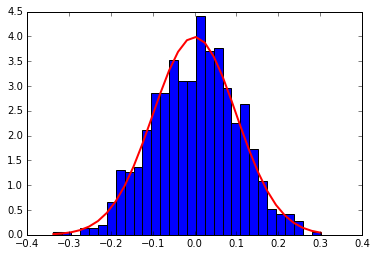

In [4]:
%matplotlib inline

import numpy as np
mu, sigma = 0, 0.1 # mean and standard deviation
s = np.random.normal(mu, sigma, 1000)
print(abs(mu - np.mean(s)) < 0.01)
print(abs(sigma - np.std(s, ddof=1)) < 0.01)

import matplotlib.pyplot as plt
count, bins, ignored = plt.hist(s, 30, normed=True)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
            np.exp( - (bins - mu)**2 / (2 * sigma**2) ),
         linewidth=2, color='r')
plt.show()